In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data_2015 = pd.read_csv('data/2015.csv')
data_2016 = pd.read_csv('data/2016.csv')
data_2017 = pd.read_csv('data/2017.csv')
data_2018 = pd.read_csv('data/2018.csv')
data_2019 = pd.read_csv('data/2019.csv')

data_2015.columns = data_2015.columns.str.replace(" ",'_')
data_2016.columns = data_2016.columns.str.replace(" ",'_')
data_2017.columns = data_2017.columns.str.replace(" ",'_')
data_2018.columns = data_2018.columns.str.replace(" ",'_')
data_2019.columns = data_2019.columns.str.replace(" ",'_')

data_2015.columns = data_2015.columns.str.lower()
data_2016.columns = data_2016.columns.str.lower()
data_2017.columns = data_2017.columns.str.lower()
data_2018.columns = data_2018.columns.str.lower()
data_2019.columns = data_2019.columns.str.lower()

data_2015 = data_2015.rename(columns={'economy_(gdp_per_capita)':'economy', 
                                      'health_(life_expectancy)':'health', 
                                      'trust_(government_corruption)':'trust'})
data_2016 = data_2016.rename(columns={'economy_(gdp_per_capita)':'economy',
                                        'health_(life_expectancy)':'health',    
                                        'trust_(government_corruption)':'trust'})
data_2017 = data_2017.rename(columns={'economy..gdp.per.capita.':'economy',
                                        'happiness.score':'happiness_score',
                                        'health..life.expectancy.':'health',
                                        'trust..government.corruption.':'trust'})   
data_2018 = data_2018.rename(columns={'country_or_region':'country',
                                        'score':'happiness_score',
                                        'gdp_per_capita':'economy',
                                        'social_support':'family',
                                        'healthy_life_expectancy':'health',
                                        'freedom_to_make_life_choices':'freedom',
                                        'generosity':'generosity',
                                        'perceptions_of_corruption':'trust'})
data_2019 = data_2019.rename(columns={'country_or_region':'country',
                                        'score':'happiness_score',
                                        'gdp_per_capita':'economy',
                                        'social_support':'family',
                                        'healthy_life_expectancy':'health',
                                        'freedom_to_make_life_choices':'freedom',
                                        'generosity':'generosity',
                                        'perceptions_of_corruption':'trust'})
                                        

In [30]:
data_2015.head(1)


,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [31]:
data_2016.head(1)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [43]:
data_2017.head(1)

,country,happiness.rank,happiness_score,whisker.high,whisker.low,economy,family,health,freedom,generosity,trust,dystopia.residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [33]:
data_2018.head(1)

,overall_rank,country,happiness_score,economy,family,health,freedom,generosity,trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [34]:
data_2019.head(1)

,overall_rank,country,happiness_score,economy,family,health,freedom,generosity,trust
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


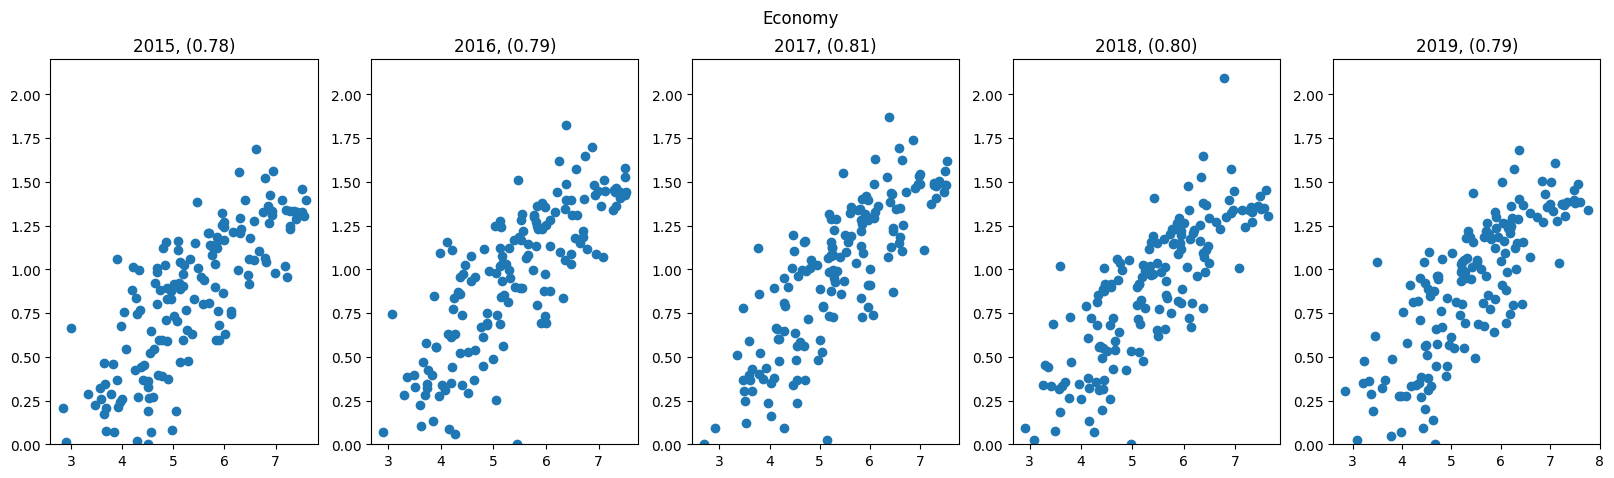

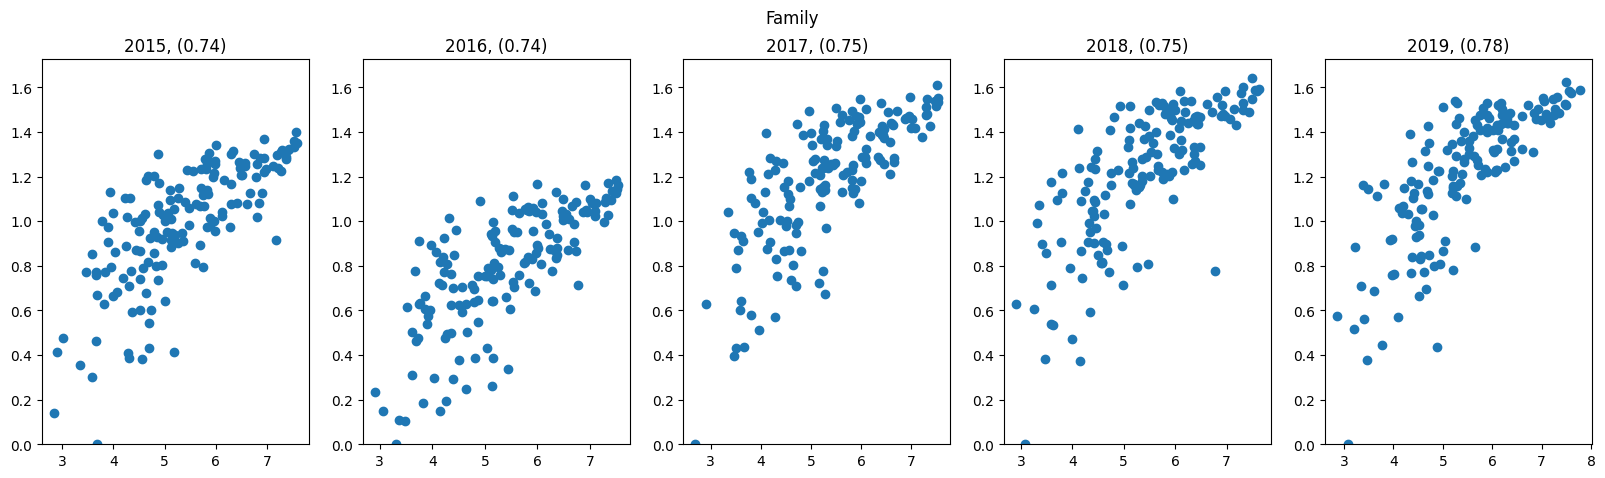

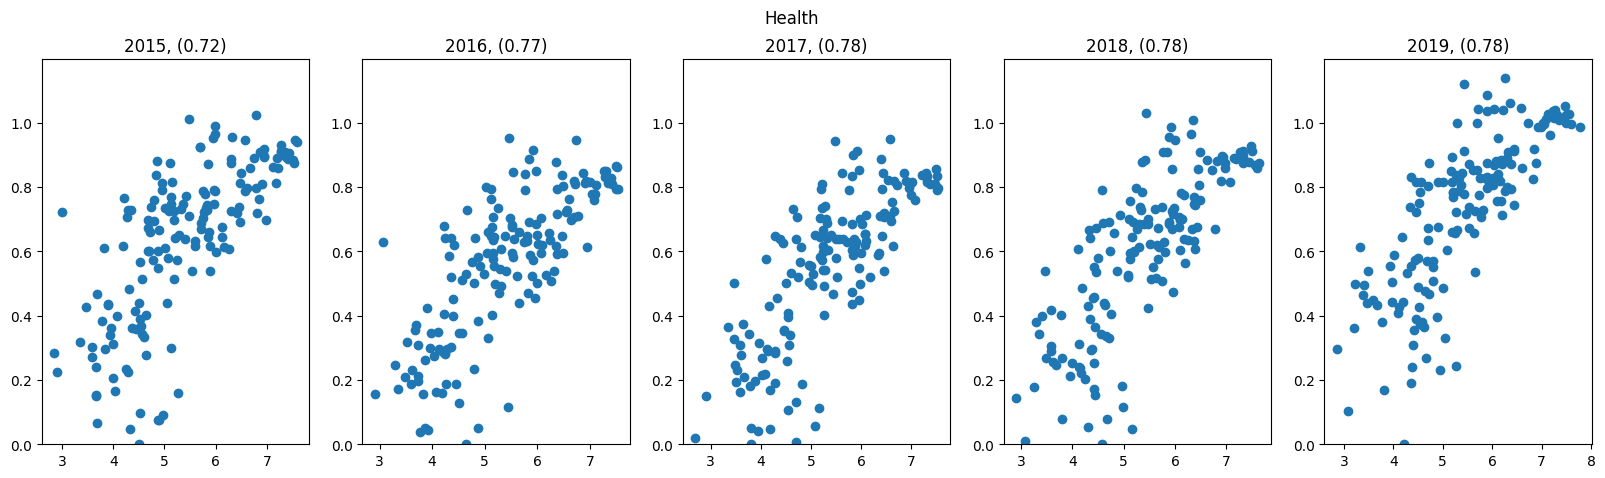

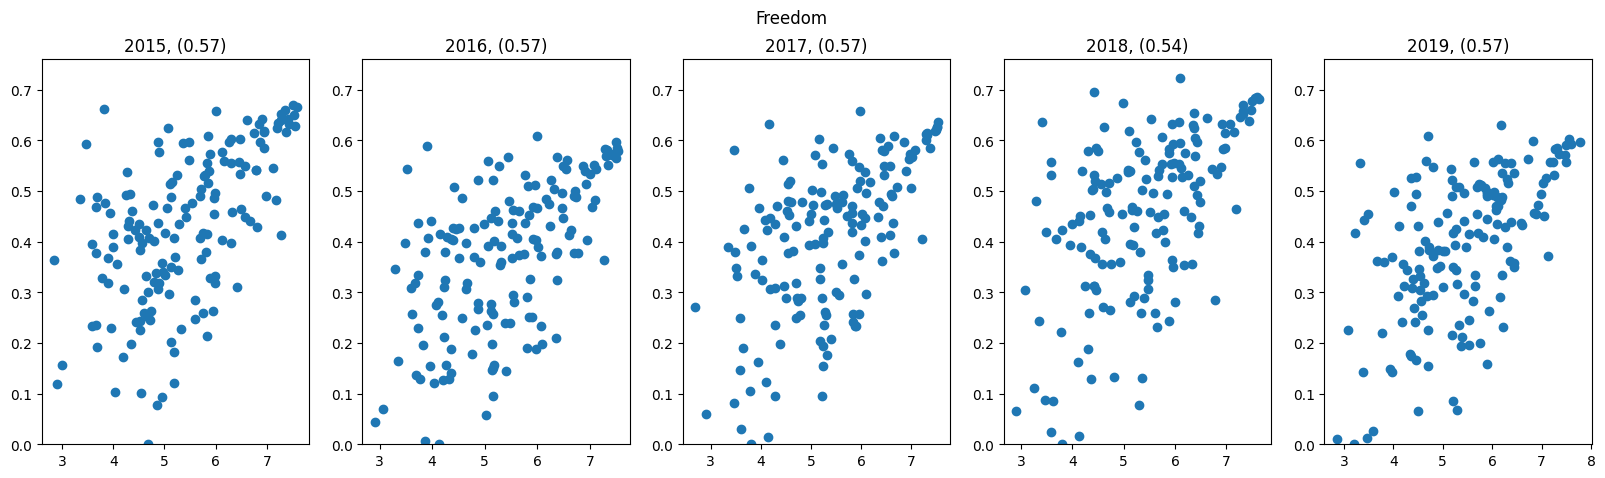

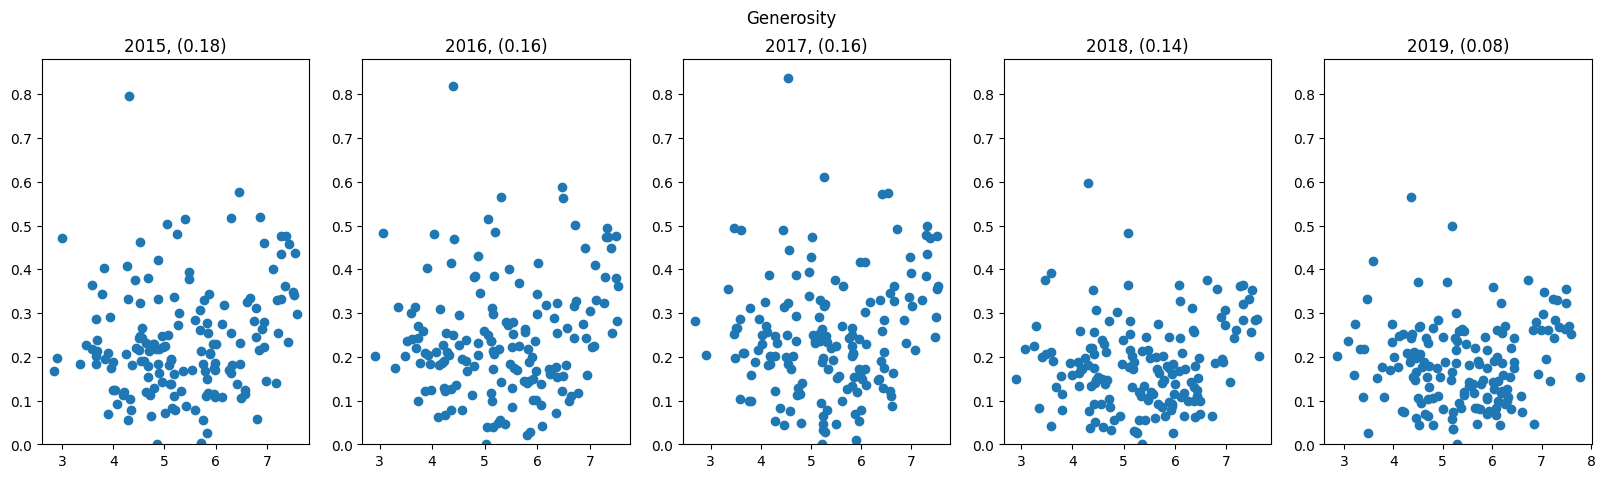

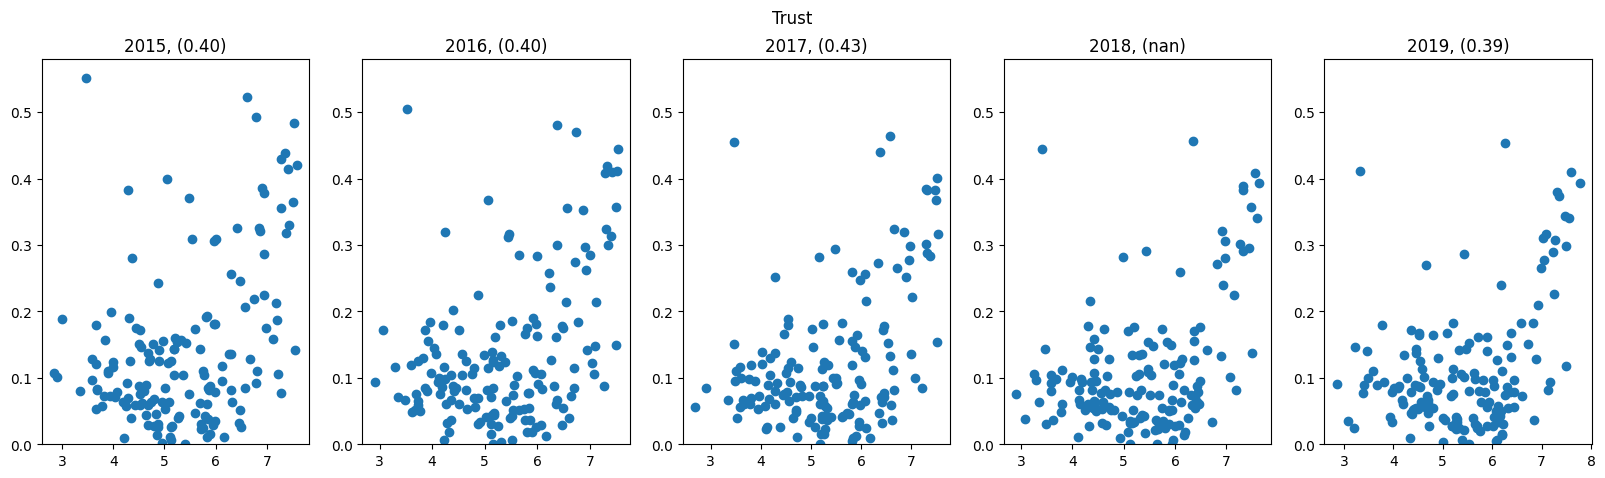

In [51]:
columns = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']

for column in columns:
    fig, axis = plt.subplots(1, 5, figsize=(20, 5))

    axis[0].scatter(data_2015['happiness_score'], data_2015[column])
    axis[0].set_title(f'2015, ({np.corrcoef(data_2015["happiness_score"], data_2015[column])[0, 1]:.2f})')

    axis[1].scatter(data_2016['happiness_score'], data_2016[column])
    axis[1].set_title(f'2016, ({np.corrcoef(data_2016["happiness_score"], data_2016[column])[0, 1]:.2f})')

    axis[2].scatter(data_2017['happiness_score'], data_2017[column])
    axis[2].set_title(f'2017, ({np.corrcoef(data_2017["happiness_score"], data_2017[column])[0, 1]:.2f})')

    axis[3].scatter(data_2018['happiness_score'], data_2018[column])
    axis[3].set_title(f'2018, ({np.corrcoef(data_2018["happiness_score"], data_2018[column])[0, 1]:.2f})')

    axis[4].scatter(data_2019['happiness_score'], data_2019[column])
    axis[4].set_title(f'2019, ({np.corrcoef(data_2019["happiness_score"], data_2019[column])[0, 1]:.2f})')

    limit = max(data_2015[column].max(), data_2016[column].max(), data_2017[column].max(), data_2018[column].max(), data_2019[column].max())*1.05
    axis[0].set_ylim(0, limit)
    axis[1].set_ylim(0, limit)
    axis[2].set_ylim(0, limit)
    axis[3].set_ylim(0, limit)
    axis[4].set_ylim(0, limit)

    fig.suptitle(column.capitalize())
    plt.show()